# คำอธิบาย
ดึงข้อมูล google.com/appsstatus/dashboard โดยใช้ python web scriping 
เพื่อตรวจจับบริการ google ว่าอยู่ในสถานะไหน
สถานะมี 4 สภานะ Available, Service information, Service disruption และ Service outage
ยกตัวอย่างบริการ google เช่น บริการ Gmail, Google Drive, Google Meet และรวมถึงบริการล่าสุดคือ Gemini ด้วย

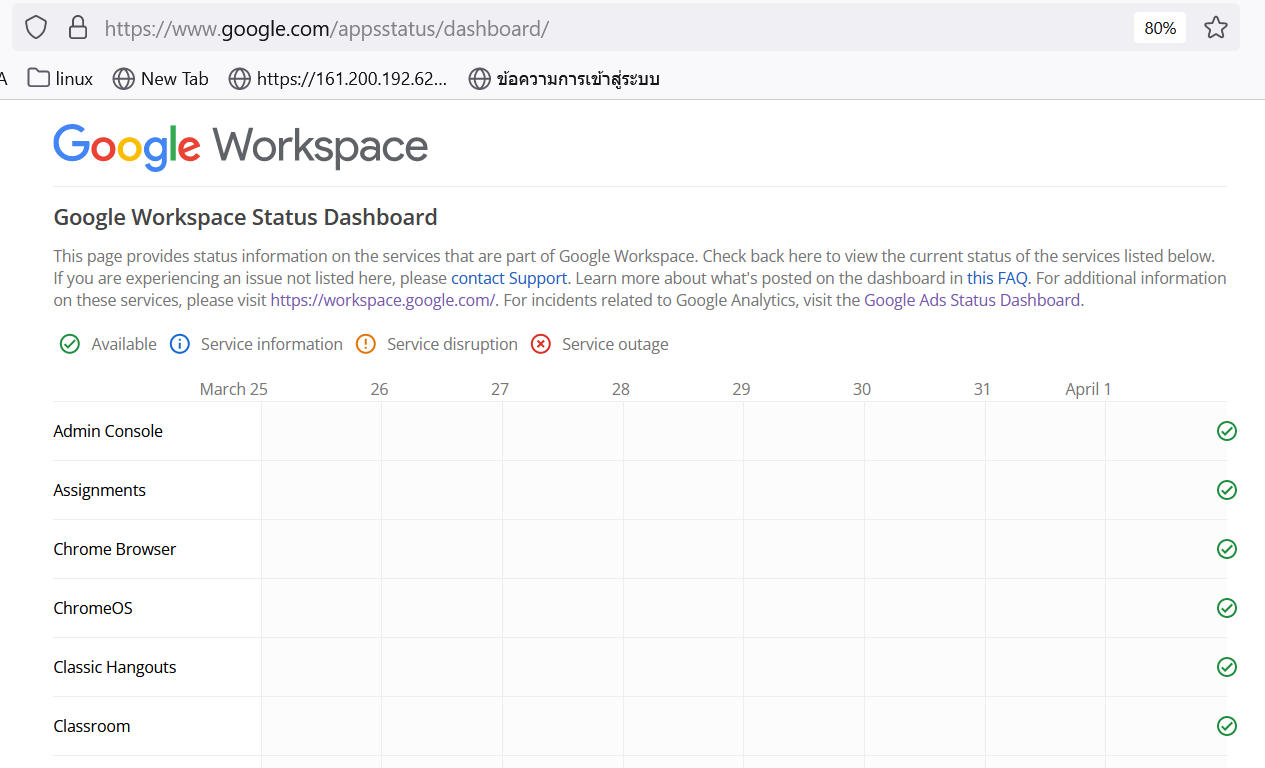

# First is Python web scraping.
ดึงข้อมูล google.com/appsstatus/dashboard โดยใช้ python web scriping

In [3]:
import requests
import bs4
from bs4 import BeautifulSoup
import json
import pandas as pd

In [60]:
url='https://www.google.com/appsstatus/dashboard/'
request = requests.get(url)
soup = bs4.BeautifulSoup(request.text)
data = soup.find_all('tr',{'class':'product-row'})


name_list = []
status_list = []
j = 0

for i in data:
    name = data[j].find('td',{'class':'product-name'}).text
    #print(name)
    name_list.append(name)
    
    data_day = data[j].find_all('td',{'class':'product-day'})
    data_day7 = data_day[7]
    status_available = data_day7.find_all('svg',{'class':'psd__status-icon psd__available'})
    status_information = data_day7.find_all('svg',{'class':'psd__status-icon psd__information'})
    status_disruption = data_day7.find_all('svg',{'class':'psd__status-icon psd__disruption'})
    status_outage = data_day7.find_all('svg',{'class':'psd__status-icon psd__outage'})
    #print(status_available)
    #print(status_information)
    #print(status_disruption)
    #print(status_outage)
    
    if status_available != [] and status_information == [] and status_disruption == [] and status_outage == []:
        status = 'available'
    elif status_available == [] and status_information != [] and status_disruption == [] and status_outage == []:
        status = 'information'
    elif status_available == [] and status_information == [] and status_disruption != [] and status_outage == []:
        status = 'disruption'
    elif status_available == [] and status_information == [] and status_disruption == [] and status_outage != []:
        status = 'outage'
    else:
        status = 'none'  
    #print(status)
    status_list.append(status)
    
    j +=1
    

#จัดการ data
df_name = pd.DataFrame([name_list]).transpose()
df_name = df_name.rename(columns={0: 'service_name'})
df_status = pd.DataFrame([status_list]).transpose()
df_status = df_status.rename(columns={0: 'service_status'})
df_name['service_status'] = df_status['service_status']

#ดึงวันที่ปัจจุบัน
from datetime import datetime
current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
df_name['current_date'] = current_time
#print(current_time)

#จัดการ data
df_name['service_name2'] = df_name['service_name'].apply(lambda i:i.strip())
df_name = df_name.drop(columns=['service_name'])
df_name = df_name.rename(columns={'service_name2': 'service_name'})
df_name = df_name.reindex(columns=['service_name', 'service_status', 'current_date'])

In [ ]:
#For testing
#df_name['service_status'][df_name['service_name']=='Gemini'] = 'Service outage'

In [61]:
df_name

,service_name,service_status,current_date
0,Admin Console,available,2024-04-07 00:08:35
1,Assignments,available,2024-04-07 00:08:35
2,Chrome Browser,available,2024-04-07 00:08:35
3,ChromeOS,available,2024-04-07 00:08:35
4,Classic Hangouts,available,2024-04-07 00:08:35
5,Classroom,available,2024-04-07 00:08:35
6,Currents,available,2024-04-07 00:08:35
7,Directory Sync,available,2024-04-07 00:08:35
8,Endpoint Management,available,2024-04-07 00:08:35
9,Gemini,available,2024-04-07 00:08:35


# Second : เขียน Python ติดต่อฐานข้อมูล SSMS

In [6]:
#เขียน Python ติดต่อฐานข้อมูล SSMS
!pip install pyodbc
#import library
import pyodbc

In [ ]:
#create database name "google_Workspace" at ssms by manual before create a connection to database

In [7]:
#Create a connection to database

try:
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-01EVDPJ\SQLEXPRESS;'
                          'Trusted_Connection=yes;'
                         'autocommit=True;')
except pyodbc.Error as e:
    print("Error: Could not make connection to database")

In [8]:
#Close connection
#and reconnect
try:
    conn.close()
except pyodbc.Error as e:
    print('Error: cannot close  connection')
    
#Re-connection and add database name
try:
    conn = pyodbc.connect('Driver={SQL Server};'
                          'Server=DESKTOP-01EVDPJ\SQLEXPRESS;'
                          'Trusted_Connection=yes;'
                          'Database=google_Workspace;'
                         'autocommit=True;')
except pyodbc.Error as e:
    print('Error: Could not make connection to database')
   
try:
    cursor = conn.cursor()
except pyodbc.Error as e:
    print('Error') 
    

In [65]:
#Create Table google_Workspace_status
#one time created
#try:
#    cursor.execute("CREATE TABLE dbo.google_Workspace_status  (\
#    id INT IDENTITY(1,1),\
#    service_name varchar(50),\
#    service_status varchar(50),\
#    created_date smalldatetime,\
#    modified_date smalldatetime);")
#except pyodbc.Error as e:
#    print(e)
    
#conn.commit()

In [9]:
#create select function

def select_service(conn, cursor, data, n):
    #select_service(conn, cursor, df_name, 0)
    try:
        service_name_db = data['service_name'][n]
        sel = "SELECT * FROM google_workspace.dbo.google_Workspace_status \
                where service_name = " + "'"+ service_name_db + "'" + ";"
        cursor.execute(sel)
    except pyodbc.Error as e:
        print(e)


In [64]:
#select_service(conn, cursor, df_name, 0)   

#ฟังก์ชั่น fetchall() เป็นฟังก์ชั่นที่ใช้สำหรับดึงเอาข้อมูลของ Database มาแสดง
#เรียกข้อมูลของเรามาทั้งหมดที่มีอยู่ในฐานข้อมูล
#row = cursor.fetchone()
#row_list = []
#while row:
    #print(row)
#    row_list.append(row)
#    row = cursor.fetchone()
#conn.commit()
    
#print(row_list)

In [10]:
#create update function

def update_service(conn, cursor, data, n):
    #update_service(conn, cursor, df_name, 0)
    
    try:       
        service_name_update = data['service_name'][n] 
        status_name_update = data['service_status'][n]
        current_date_update = data['current_date'][n]
        #current_date_update = "2024-03-30 22:47:32"
        #status_name_update = 'avalibility'

        sql = '''UPDATE google_workspace.dbo.google_Workspace_status 
        SET service_status = '%s' , 
        modified_date = '%s' 
        WHERE service_name = '%s' '''
        val = (status_name_update, current_date_update, service_name_update) 
        cursor.execute(sql %val)

    except pyodbc.Error as e:
        print(e)
    conn.commit()   


In [11]:
#create insert function
def insert_service(conn, cursor, data, n):
    #insert_service(conn, cursor, df_name, 0)
    service_name_update = data['service_name'][n] 
    status_name_update = data['service_status'][n]
    current_date_update = data['current_date'][n]
    try:
        ins = "INSERT INTO google_workspace.dbo.google_Workspace_status (service_name, service_status, created_date, modified_date) VALUES(?,?,?,?)"
        val = service_name_update, status_name_update, current_date_update, current_date_update
        cursor.execute(ins,val)
    except pyodbc.Error as e:
        print(e)
    conn.commit()

# Third: status changed to Line api 

In [45]:
import requests

def linenoti(ip_msg,status):
    #linenoti('Yo!')
    token = 'xxx'
    url = 'https://notify-api.line.me/api/notify'
    headers = {'Content-Type': 'application/x-www-form-urlencoded',
              'Authorization': 'Bearer ' + token}
    msg = ip_msg
    if status == 'available':
        req = requests.post(url, headers=headers, data= {'stickerPackageId': 789, 'stickerId':10858, 'message':msg})
    else:
        req = requests.post(url, headers=headers, data= {'stickerPackageId': 4, 'stickerId':274, 'message':msg})
    
    #print(req)

# main 

In [ ]:

#เมื่อ มี service ใหม่ > insert ข้อมูลไปที่ ssms database, 
#เมื่อ status ไม่ใช่ avalibility > update status ไปที่ ssms database, 
#เมื่อ status ไม่ใช่ avalibility > ส่งแจ้งเตือนทาง LINE 

In [ ]:
#TRUNCATE TABLE google_Workspace_status;

In [62]:
import requests

j = 0
for i in df_name['service_name']:  
    service_name_j = df_name['service_name'][j]
    service_status_current_j = df_name['service_status'][j]
    current_date_j = df_name['current_date'][j] 
    
    #query current service_name 
    select_service(conn, cursor, df_name, j)

    #ฟังก์ชั่น fetchall() เป็นฟังก์ชั่นที่ใช้สำหรับดึงเอาข้อมูลของ Database มาแสดง
    #เรียกข้อมูลของเรามาทั้งหมดที่มีอยู่ในฐานข้อมูล
    row = cursor.fetchone()
    row_list = []
    while row:
        #print(row)
        row_list.append(row)
        row = cursor.fetchone()
    conn.commit()
    #print(row_list)
    #row_list
    #[1, 'Admin Console', 'available', datetime.datetime(2024, 3, 26, 23, 21), datetime.datetime(2024, 3, 26, 23, 21)]

    #ถ้ายังไม่มี service_name ใน DB ให้ insert (row_list = [])
    if row_list == []:
        insert_service(conn, cursor, df_name, j)
        #print(row_list)
    elif row_list[0][2] != service_status_current_j:
        #ถ้า current_status update ให้ update ลง batabase และ ส่ง lineNoti
        if service_status_current_j == 'available':
            print(service_status_current_j)
            update_service(conn, cursor, df_name, j)
            msg = 'service name : ' + service_name_j + \
            ' is ' + service_status_current_j + \
            ' on ' + current_date_j + \
            '\n!!CLEAR!!'
            linenoti(msg,service_status_current_j)
            
        #ถ้า current_status ไม่ avaliable ให้ updateลง database
        elif service_status_current_j != 'available':
            update_service(conn, cursor, df_name, j)
            msg = 'service name : ' + service_name_j + \
            ' is ' + service_status_current_j + \
            ' on ' + current_date_j + \
            '\n!!Please invetigate!!'
            linenoti(msg,service_status_current_j)   
    j +=1 

available


# ทดสอบ

In [63]:
#เมื่อ service เกิด alert
#update ที่ ssms
#ส่ง LINE alert

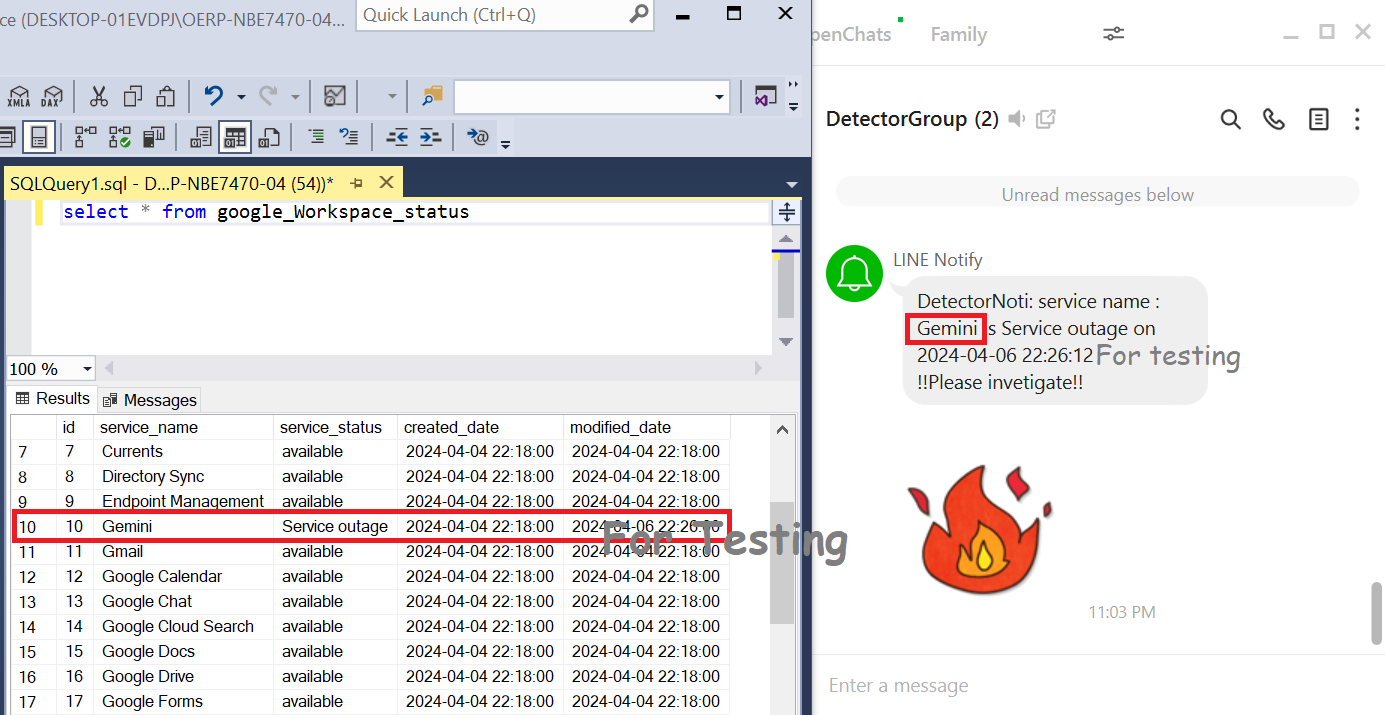

In [ ]:
#เมื่อ service เกิด clear
#update ที่ ssms
#ส่ง LINE แจ้ง status

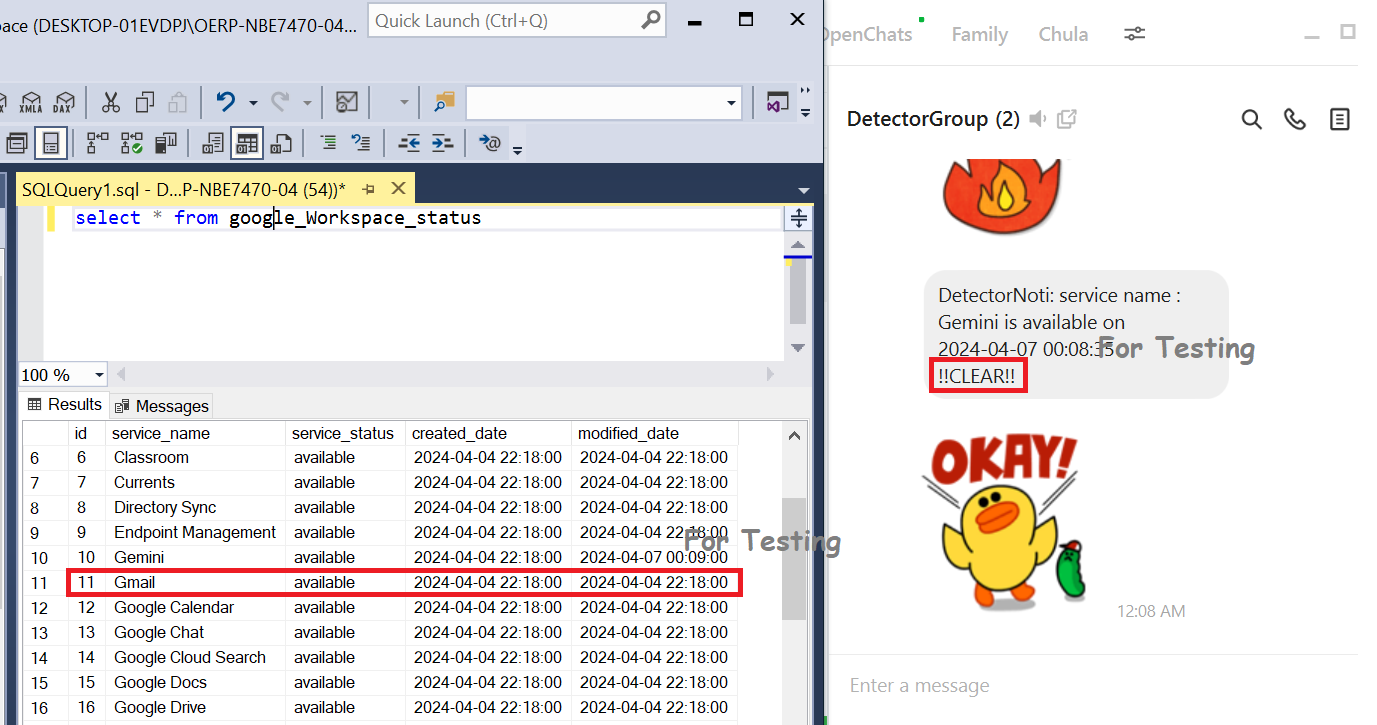

# LINE Chatbot

https://adamblog.co/line-bot-integrate-with-google-sheet/